# init

In [4]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.crs import CRS
from rasterio.plot import show
#from shapely.geometry import mapping
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [5]:
def getFeatures(gdf):
    #Function to parse features from GeoDataFrame in such a manner that rasterio wants them
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

# input

In [2]:
#input a vector and a raster file
AOI_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
AOI_file = 'MAN_LIM_BoundingBox_AOI_A.shp'

AOI_gdf = gpd.read_file(AOI_path/AOI_file)

raster_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
raster_file = 'MAN_DEM_elevation_TanDEM_X_30m_noclip.tif'
in_raster = rasterio.open(raster_path/raster_file, 'r+') #note that the raster and AOI must be in the same CRS
print('AOI:', AOI_gdf.crs.to_epsg(),'Raster:', in_raster.crs)

AOI: 32651 Raster: EPSG:32651


In [6]:
#get the coordinates of the AOI
AOI_geom = AOI_gdf.geometry
coords = getFeatures(AOI_gdf)
clipped_array, clipped_transform = mask(dataset=in_raster, shapes=AOI_geom, crop=True)

In [7]:
#setting up the output file
out_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
out_file = 'MAN_DEM_elevation_TanDEM_X_30m.tif'
out_url = out_path/out_file

AOI_gdf = AOI_gdf.to_crs(in_raster.crs)
out_meta = in_raster.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": clipped_array.shape[1],
                 "width": clipped_array.shape[2],
                 "transform": clipped_transform})

with rasterio.open(out_url, "w", **out_meta) as dest:
    dest.write(clipped_array)

(228159.65590334672, 355157.9462326235, 1523064.9856872046, 1684836.8629805148)

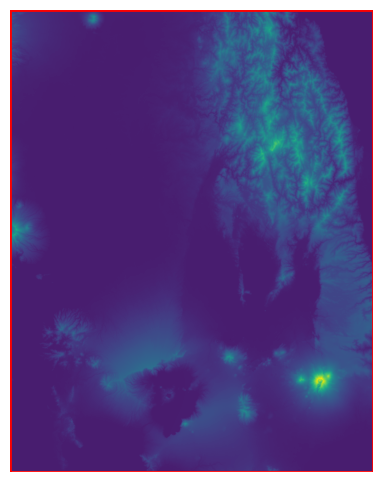

In [8]:
#plotting to be sure it worked
clipped = rasterio.open(out_url)
fig, ax = plt.subplots(figsize=(8, 6))
p1 = AOI_gdf.plot(color=None,facecolor='none',edgecolor='red',linewidth = 2,ax=ax)
show(clipped, ax=ax)
ax.axis('off')